# Wine Quality Classification: Red wine

In [35]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

# Prepare Data

## Import

In [2]:
# Read the red wine dataset
df_red = pd.read_csv("winequality-red.csv", sep=';')

In [3]:
df_red.info()
df_red.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Explore

In [4]:
df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Red Wine Dataset Insights:**

- The red wine dataset contains 1599 entries.
- Attributes like "volatile acidity," "chlorides," and "total sulfur dioxide" have relatively higher standard deviations, indicating potential variability.
- "Quality" ranges from 3 to 8, indicating wines of different qualities.
- Fixed acidity levels vary from 4.6 to 15.9, showing diversity in acidity.
- Most attributes have median values close to their means, suggesting relatively balanced distributions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


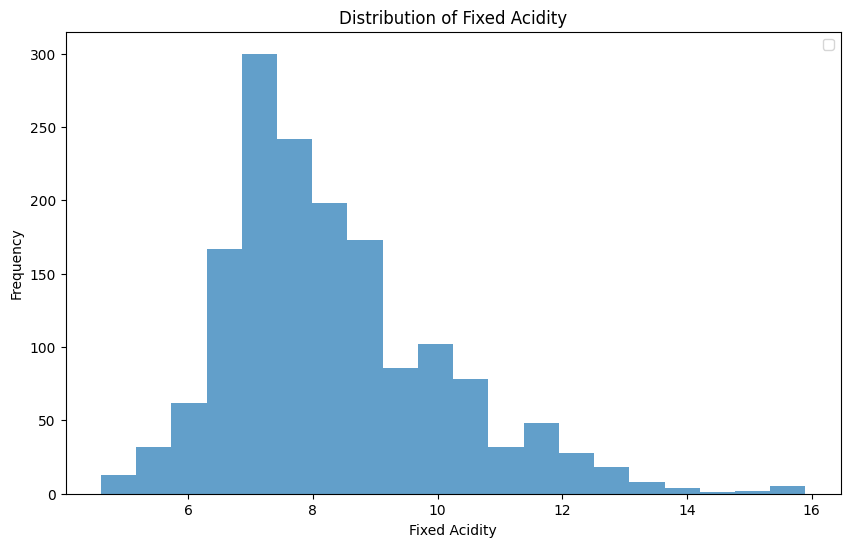

In [5]:
# Univariate Analysis: Histogram for Fixed Acidity
plt.figure(figsize=(10, 6))
plt.hist(df_red["fixed acidity"], bins=20,alpha=0.7)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Fixed Acidity')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


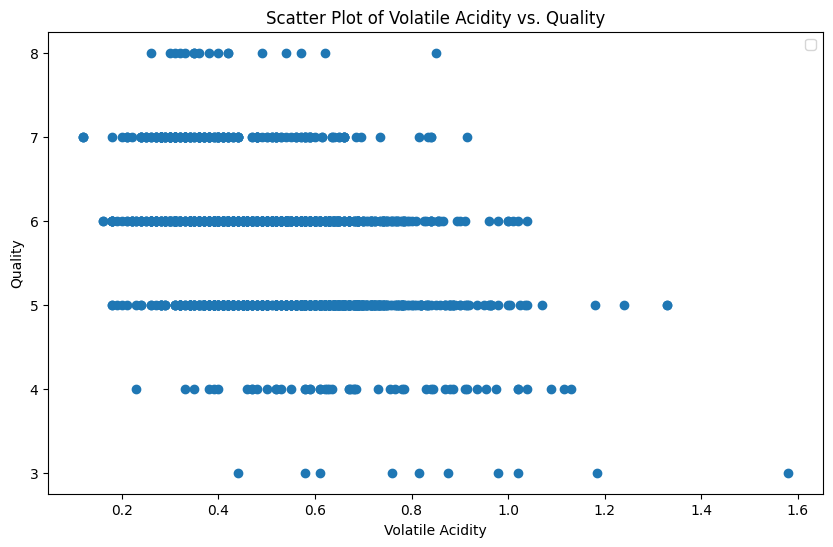

In [6]:
# Bivariate Analysis: Scatter Plot for Volatile Acidity vs. Quality
plt.figure(figsize=(10, 6))
plt.scatter(df_red["volatile acidity"], df_red["quality"])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.legend()
plt.title('Scatter Plot of Volatile Acidity vs. Quality')
plt.show()

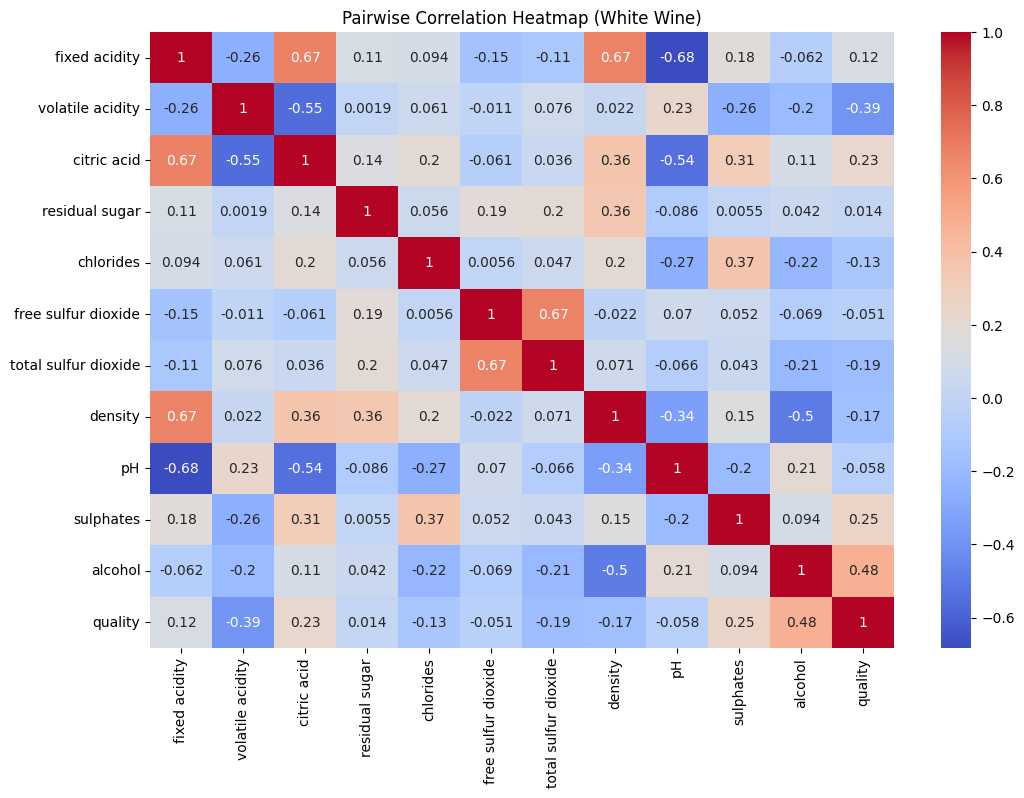

In [7]:
# Pairwise Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_red.corr(), annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap (White Wine)')
plt.show()

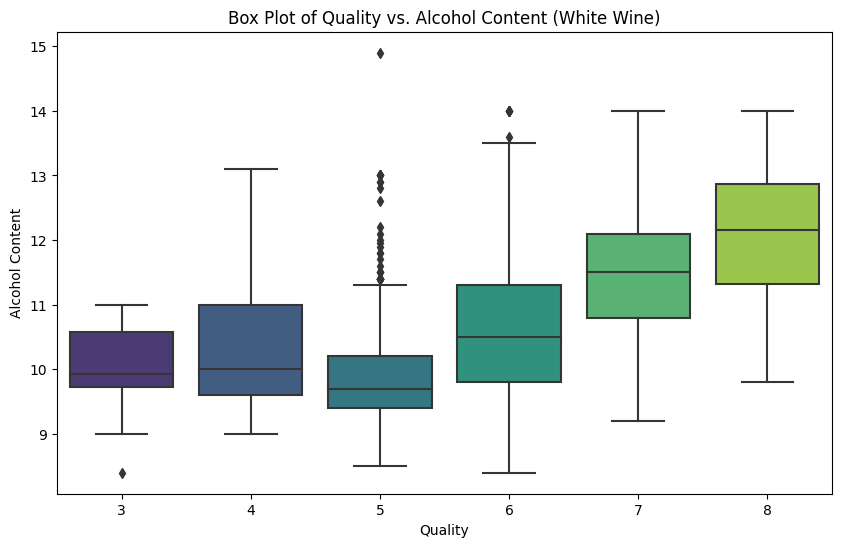

In [8]:
# Box Plot for Quality vs. Alcohol Content
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df_red, palette='viridis')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.title('Box Plot of Quality vs. Alcohol Content (White Wine)')
plt.show()

In [9]:
# Interactive 3D Scatter Plot using Plotly
fig = px.scatter_3d(df_red, x='alcohol', y='volatile acidity', z='quality', color='quality')
fig.update_layout(scene=dict(xaxis_title='Alcohol', yaxis_title='Volatile Acidity', zaxis_title='Quality'))
fig.show()

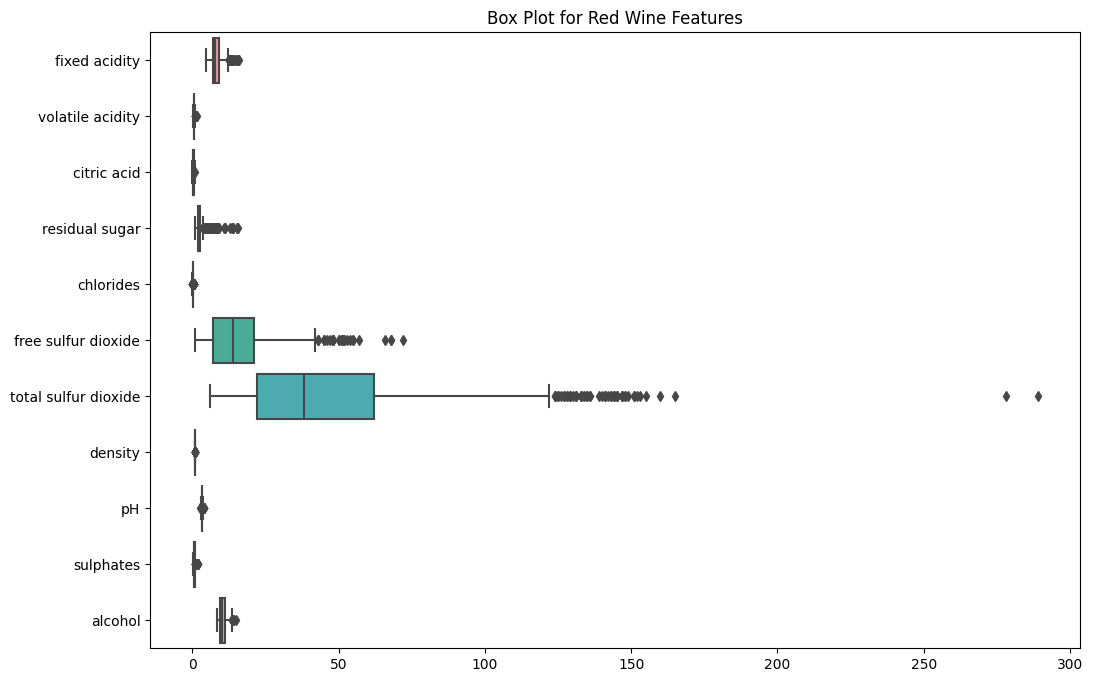

In [10]:
# Box Plot for Red Wine Features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_red.drop(columns=['quality']), orient='h')
plt.title("Box Plot for Red Wine Features")
plt.show()

In [12]:
# Pairwise Scatter Plots for Red Wine
sns.pairplot(df_red, hue='quality')
plt.title("Pairwise Scatter Plots for Red Wine")
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



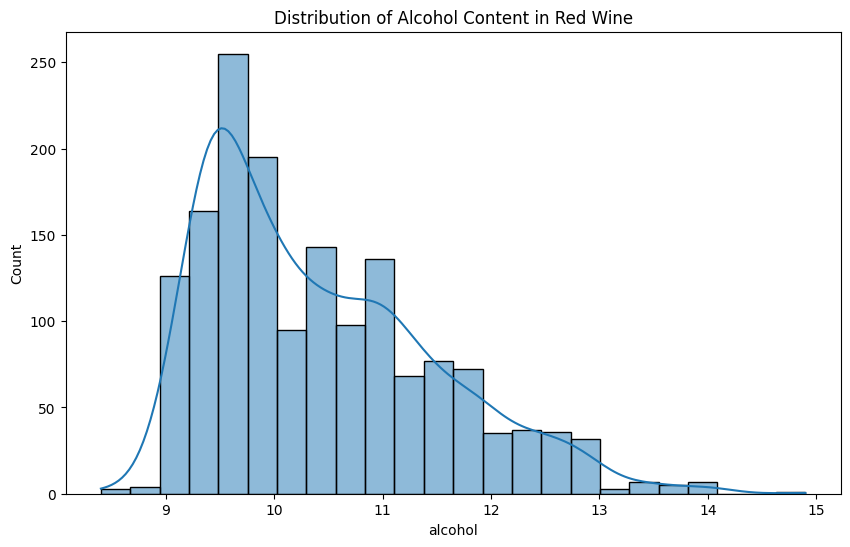

In [13]:
# Distribution of Alcohol Content in White Wine
plt.figure(figsize=(10, 6))
sns.histplot(data=df_red, x='alcohol', kde=True)
plt.title("Distribution of Alcohol Content in Red Wine")
plt.show()

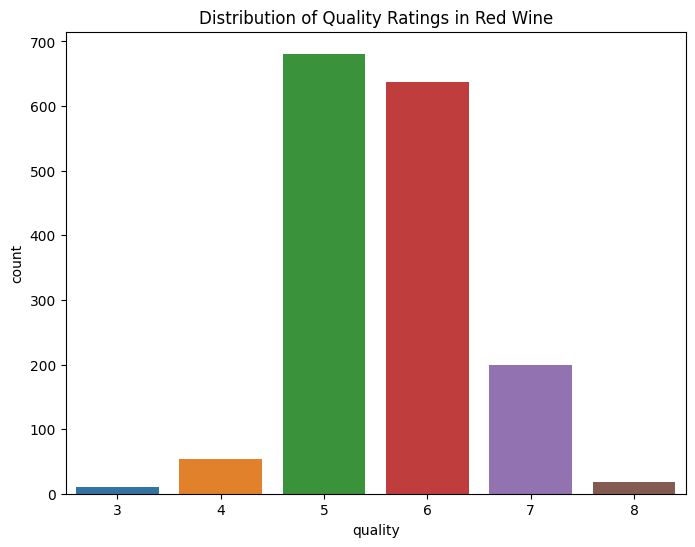

In [14]:
# Distribution of Quality Ratings in White Wine
plt.figure(figsize=(8, 6))
sns.countplot(data=df_red, x='quality')
plt.title("Distribution of Quality Ratings in Red Wine")
plt.show()

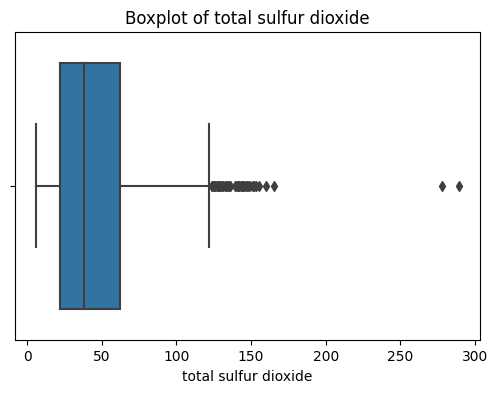

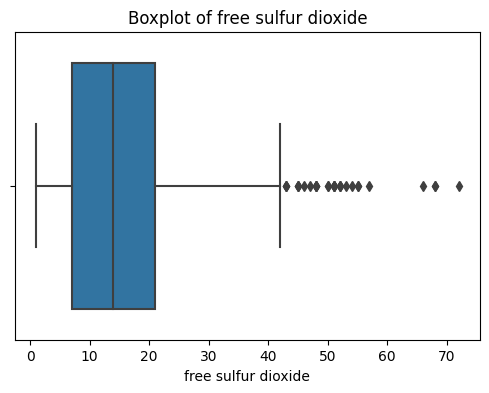

In [15]:
# Columns to plot
columns_to_plot = ["total sulfur dioxide", "free sulfur dioxide"]

# Create separate boxplots for each column in df_red
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_red[column], orient="h")
    plt.xlabel(column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [16]:
df_red['quality'].value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [18]:
# Convert quality column to binary classification
df_red['quality'] = np.where(df_red['quality'] >= 7, 1, 0)

In [19]:
df_red['quality'].value_counts(normalize=True)

0    0.86429
1    0.13571
Name: quality, dtype: float64

## Split

In [20]:
# Preprocess red wine data
X_red = df_red.drop("quality", axis=1)
y_red = df_red["quality"]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

In [21]:
# Removing outliers using Z-score
z_scores_red = zscore(X_train_red)
mask_red = (z_scores_red < 3).all(axis=1)
X_train_red = X_train_red[mask_red]
y_train_red = y_train_red[mask_red]

In [22]:
# Applying SMOTE
sm = SMOTE(random_state=42, ratio=1.0)
X_train_red, y_train_red = sm.fit_sample(X_train_red, y_train_red)

TypeError: SMOTE.__init__() got an unexpected keyword argument 'ratio'

In [24]:
# Feature selection
selector = SelectKBest(f_classif, k=10)
X_new_red = selector.fit_transform(X_red, y_red)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_new_red, y_red, test_size=0.2, random_state=42)

# Build Model

## Baseline

In [41]:
acc_baseline = y_train_red.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.87


## Iterate

In [25]:
# Creating and training the RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train_red, y_train_red)

RandomForestClassifier(criterion='entropy')

In [26]:
# Evaluating the model
accuracy_red = rfc.score(X_test_red, y_test_red)
print("Accuracy for red wine dataset:", accuracy_red)

Accuracy for red wine dataset: 0.9


In [27]:
# Cross-validation
cv_results_red = cross_validate(rfc, X_new_red, y_red, cv=10, scoring=["accuracy", "precision", "recall"])
print("Accuracy from cross-validation:", cv_results_red["test_accuracy"].mean())

Accuracy from cross-validation: 0.8711831761006289


In [31]:
# Grid Search for hyperparameter tuning
criterion = ['gini', 'entropy']
n_estimators = [100, 200, 300]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, None]

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

gs = GridSearchCV(rfc, param_grid=params, n_jobs=2)
gs.fit(X_train_red, y_train_red)

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy'), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [32]:
best_params = gs.best_params_
print("Best parameters:", best_params)

best_score = gs.best_score_
print("Best score:", best_score)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
Best score: 0.9116574754901962


## Evaluate

In [33]:
# Final evaluation using best parameters
best_rfc = gs.best_estimator_
final_accuracy = best_rfc.score(X_test_red, y_test_red)
print("Final accuracy with best parameters:", final_accuracy)

Final accuracy with best parameters: 0.896875


In [34]:
# Classification report
y_pred_red = best_rfc.predict(X_test_red)
report = classification_report(y_test_red, y_pred_red)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



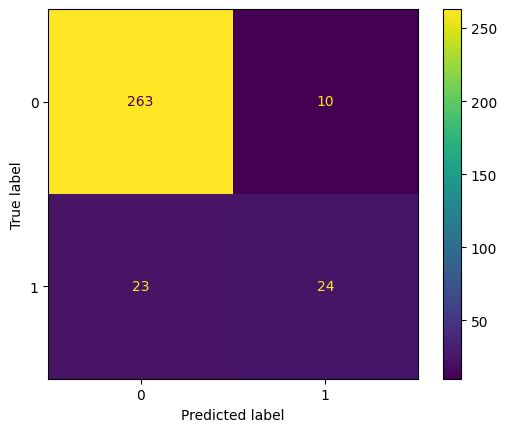

In [38]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rfc,X_test_red,y_test_red);

# Communicate

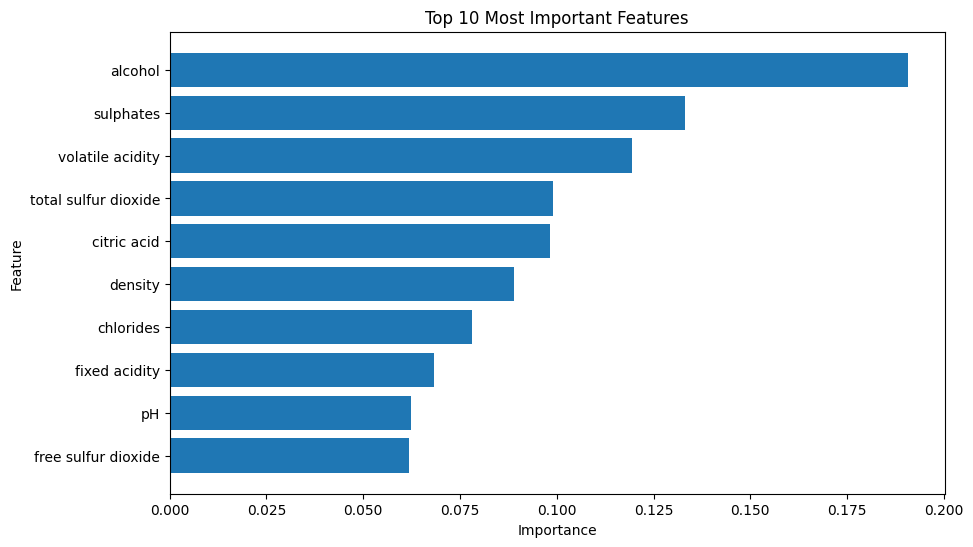

In [39]:
# Get feature importances from the trained model
feature_importances = best_rfc.feature_importances_

# Get the column names of the selected features
selected_feature_names = X_red.columns[selector.get_support(indices=True)]

# Create a DataFrame with feature importances and names
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_features = feature_importance_df.head(10)

# Plotting the 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [42]:
top_features

Feature  Importance
9               alcohol    0.190652
8             sulphates    0.133103
1      volatile acidity    0.119497
5  total sulfur dioxide    0.098978
2           citric acid    0.098275
6               density    0.089068
3             chlorides    0.078054
0         fixed acidity    0.068356
7                    pH    0.062223
4   free sulfur dioxide    0.061795

In [40]:
# Save model
with open("model-red.pkl", "wb") as f:
    pickle.dump(best_rfc,f)

## In conclusion, 
this red wine quality classification project successfully predicted wine quality with a well-balanced model performance. The analysis highlighted crucial features affecting predictions and showcased the importance of alcohol content in determining red wine quality.Further refinements and model iterations can be explored to enhance performance even more.